# EDA

In [125]:
import pandas as pd
df = pd.read_csv("c:/Users/Quang/Customer-Segmentation/data/processed/cleaned_data.csv")

##### 1. Phân tích phân phối (Distribution Analysis)

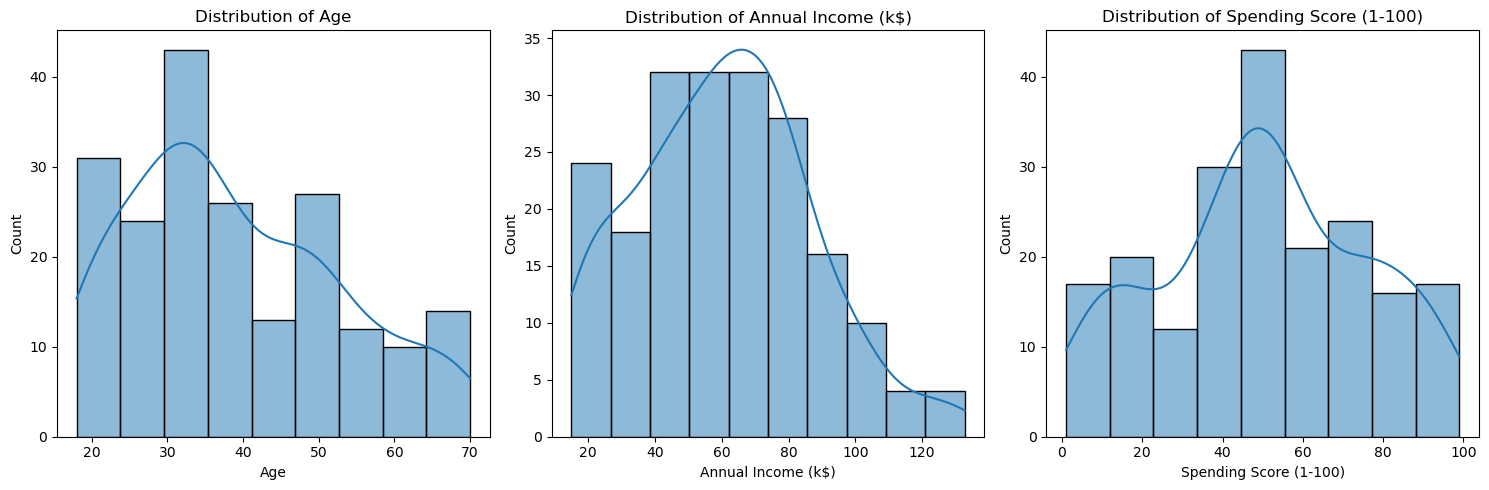

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('c:/users/quang/customer-segmentation/reports/figures/distributions.png')
plt.show()

##### 2. Phân tích mối quan hệ giữa các biến

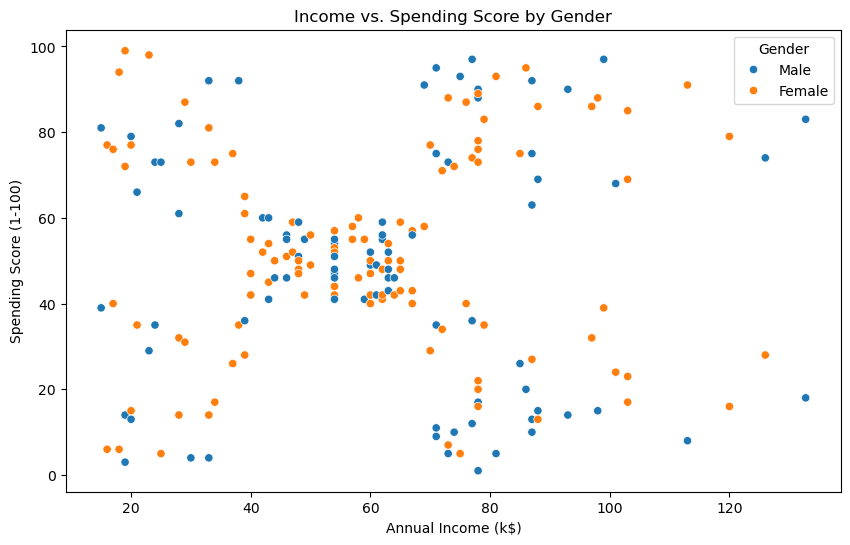

In [129]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Income vs. Spending Score by Gender')
plt.savefig('c:/users/quang/customer-segmentation/reports/figures/income_vs_spending.png')
plt.show()

##### 3. Phân tích theo giới tính

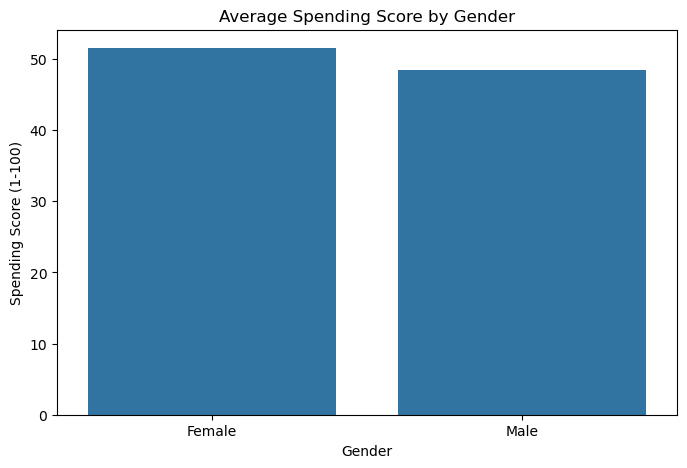

In [133]:
gender_spending = df.groupby('Gender')['Spending Score (1-100)'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_spending, x='Gender', y='Spending Score (1-100)')
plt.title('Average Spending Score by Gender')
plt.savefig('c:/users/quang/customer-segmentation/reports/figures/gender_spending.png')
plt.show()

##### 4. Phân tích theo nhóm tuổi

In [145]:
age_mean = 38.85  
age_std = 13.97  

df['Age_real'] = df['Age'] * age_std + age_mean

df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 100], 
                         labels=['<20', '20-30', '30-40', '40-50', '50+'], 
                         include_lowest=True)

age_group_stats = df.groupby('Age_Group', observed = True)[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(age_group_stats)


           Annual Income (k$)  Spending Score (1-100)
Age_Group                                            
<20                 51.117647               44.647059
20-30               56.661111               67.222222
30-40               68.562500               57.500000
40-50               63.605263               34.394737
50+                 53.850000               37.475000


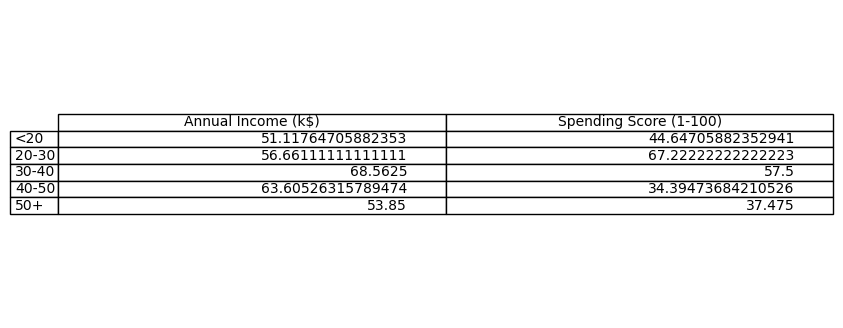

In [147]:
fig, ax = plt.subplots(figsize=(10, 4)) 
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=age_group_stats.values,
                colLabels=age_group_stats.columns,
                rowLabels=age_group_stats.index,
                loc='center')

table_image_path = 'c:/Users/Quang/Customer-Segmentation/reports/figures/age_group_stats.png'
plt.savefig(table_image_path, bbox_inches='tight')
plt.show()

##### 5. Heatmap tương quan

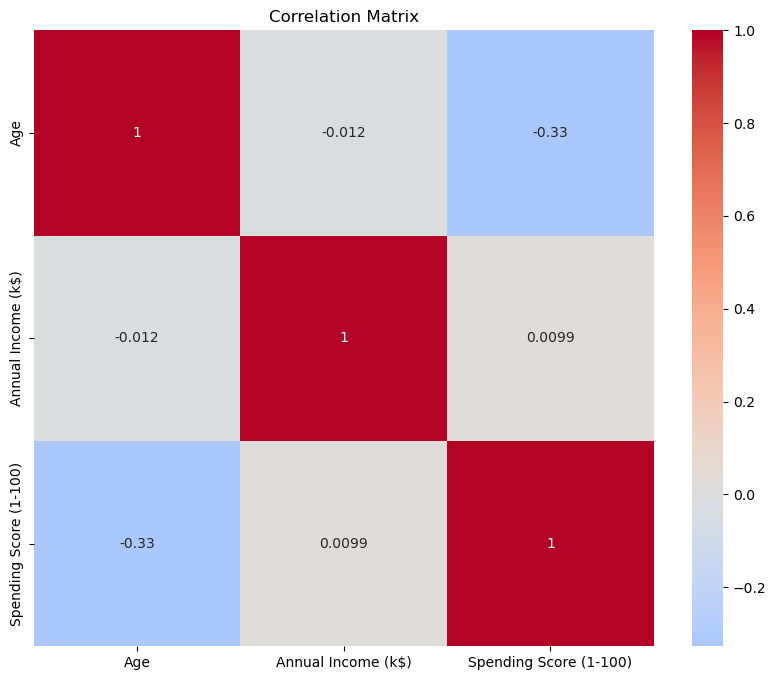

In [149]:
corr_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.savefig('c:/Users/Quang/Customer-Segmentation/reports/figures/correlation_heatmap.png')
plt.show()

##### 6. Pairplot tổng quan

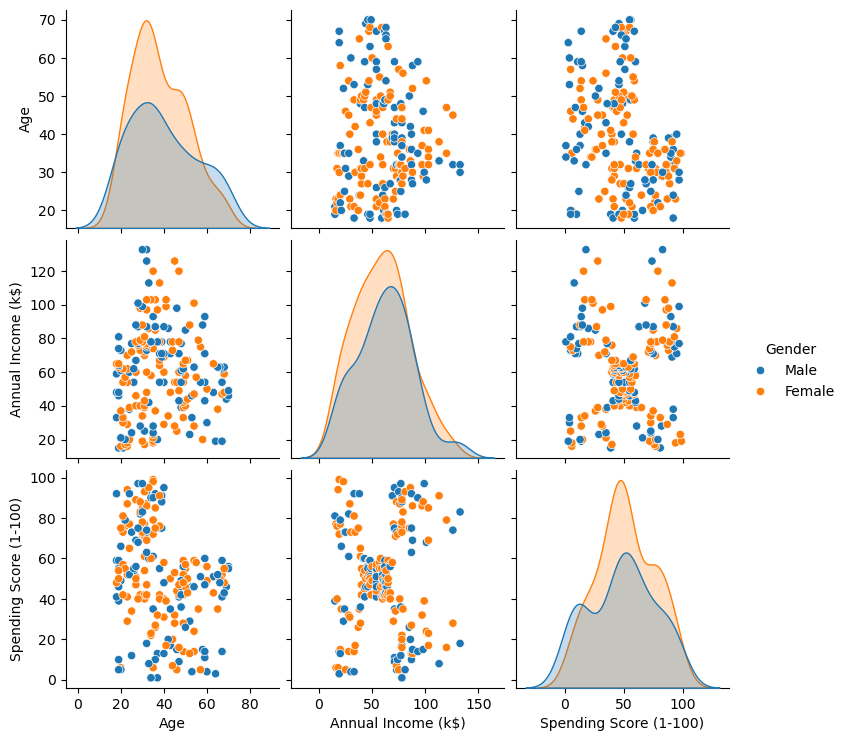

In [151]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender')
plt.savefig('c:/Users/Quang/Customer-Segmentation/reports/figures/pairplot.png')

##### 7. Boxplot phát hiện outliers:

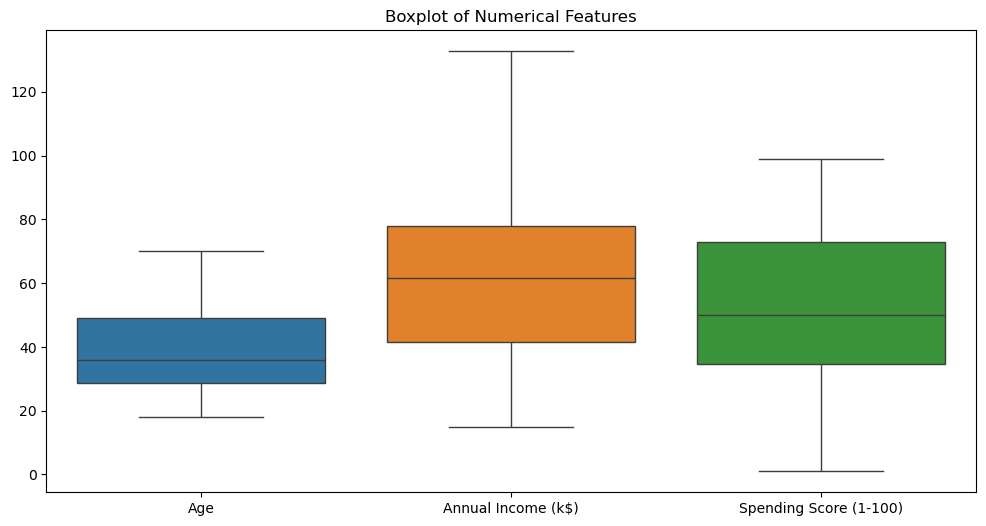

In [153]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Boxplot of Numerical Features')
plt.savefig('c:/Users/Quang/Customer-Segmentation/reports/figures/boxplot_outliers.png')

In [ ]:
plt.boxplot(

### Thêm tất cả hình ảnh vào eda_summary.md

In [11]:
figures_path = "c:/Users/Quang/Customer-Segmentation/reports/figures/"
md_file = "c:/Users/Quang/Customer-Segmentation/reports/results/EDA/eda_summary.md"

with open(md_file, 'w', encoding='utf-8') as f:
    f.write("# Exploratory Data Analysis (EDA)\n\n")
    for img_file in image_files:
        img_name = img_file.replace("_", " ").replace(".png", "")
        f.write(f"## {img_name}\n")
        f.write(f"![{img_name}](../../figures/{img_file})\n\n")
